# NANGOLI SAMUEL M24B13/039


In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import scipy as sp
import matplotlib.pyplot as plt

In [66]:
sam= pd.read_csv('Q3_insurance.csv.xls')

In [46]:
from scipy import stats

In [35]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
sam

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
# Function to perform chi-square test for categorical variables
def chi_square_test(sam, sex, smoker):
    contingency_table = pd.crosstab(sam['sex'], sam['smoker'])
    sam, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    return p_value
print(p_value)

0.03613272100592976


In [69]:
# Function to perform t-test for numerical variables
from scipy import stats
def t_test(sam, sex_var, age_var):
    group1 = sam[sam[sex_var] == sam[sex_var].unique()[0]][age_var]
    group2 = sam[sam[sex_var] == sam[sex_var].unique()[1]][age_var]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return p_value
print('The p value is', p_value)

The p value is 0.03613272100592976


In [49]:

# List of variables (excluding 'sex')
variables = [col for col in sam.columns if col != 'sex']
variables

['age', 'bmi', 'children', 'smoker', 'region', 'charges']

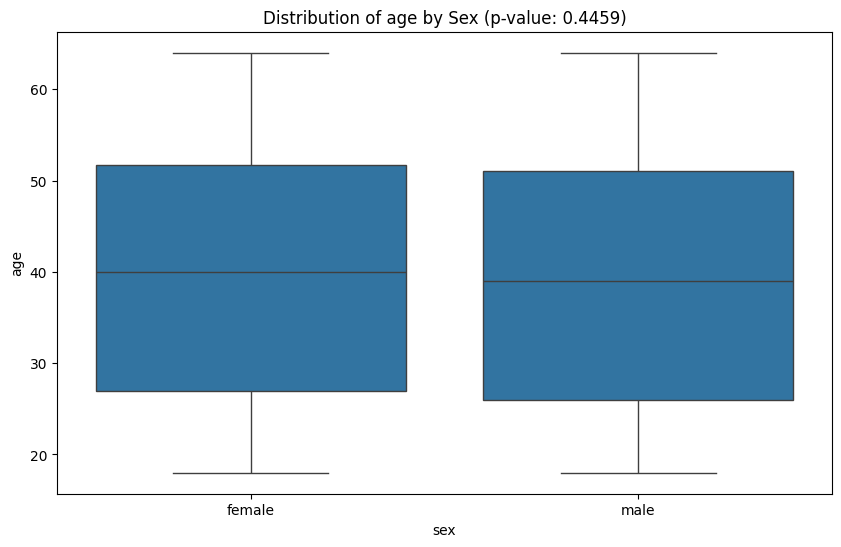

P-value for relationship between 'sex' and 'age': 0.4459
Not statistically significant



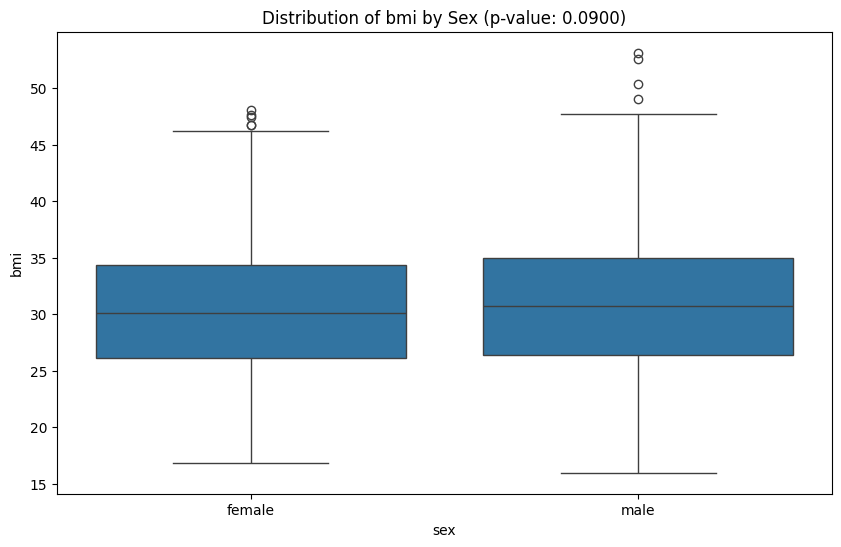

P-value for relationship between 'sex' and 'bmi': 0.0900
Not statistically significant



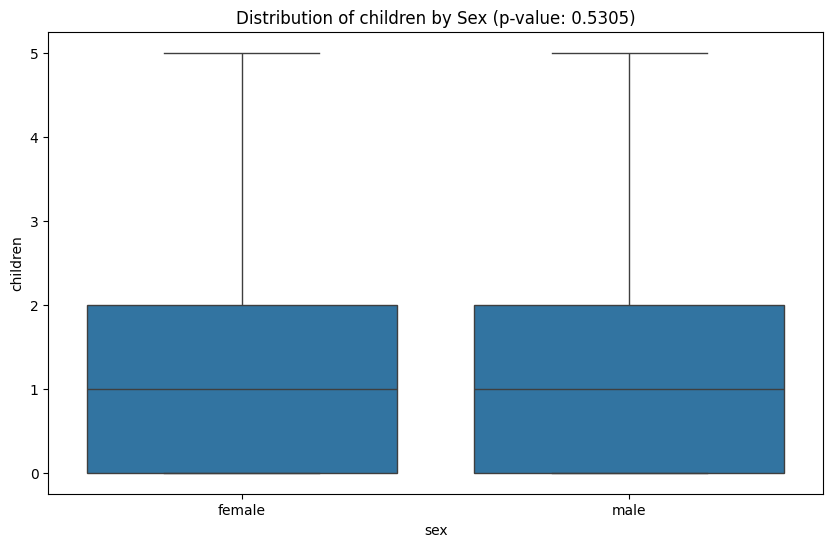

P-value for relationship between 'sex' and 'children': 0.5305
Not statistically significant



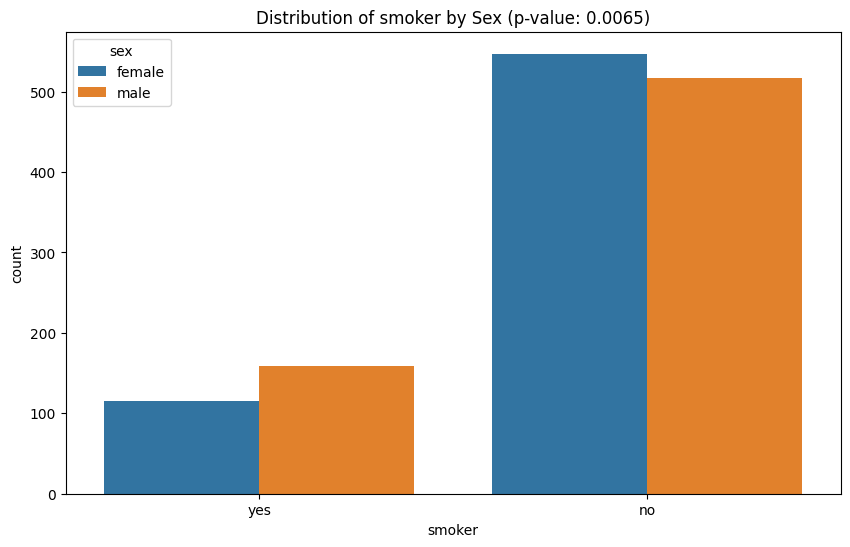

P-value for relationship between 'sex' and 'smoker': 0.0065
Statistically significant



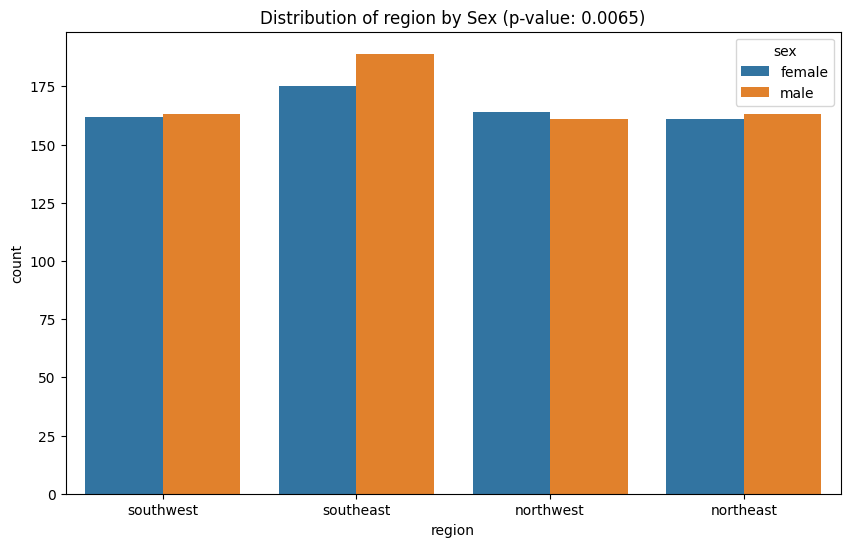

P-value for relationship between 'sex' and 'region': 0.0065
Statistically significant



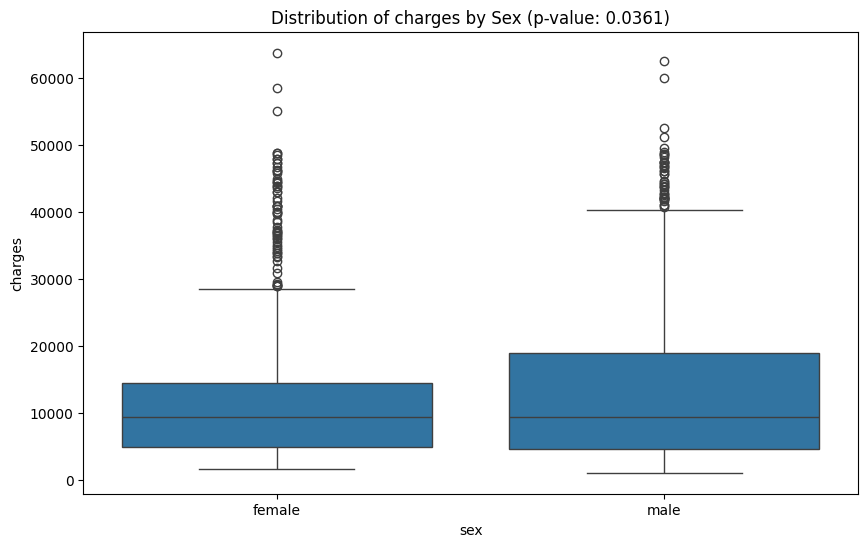

P-value for relationship between 'sex' and 'charges': 0.0361
Statistically significant



In [ ]:
# Perform statistical tests and create visualizations
for var in variables:
    if sam[var].dtype == 'object':
        p_value = chi_square_test(sam, 'sex', var)
        plt.figure(figsize=(10, 6))
        sns.countplot(data=sam, x=var, hue='sex')
        plt.title(f'Distribution of {var} by Sex (p-value: {p_value:.4f})')
        plt.show()
    else:
        p_value = t_test(sam, 'sex', var)
        plt.figure(figsize=(10,6))
        sns.boxplot(data=sam, x='sex', y=var)
        plt.title(f'Distribution of {var} by Sex (p-value: {p_value:.4f})')
        plt.show()
    
    print(f"P-value for relationship between 'sex' and '{var}': {p_value:.4f}")
    print("Statistically significant" if p_value < 0.05 else "Not statistically significant")
    print()

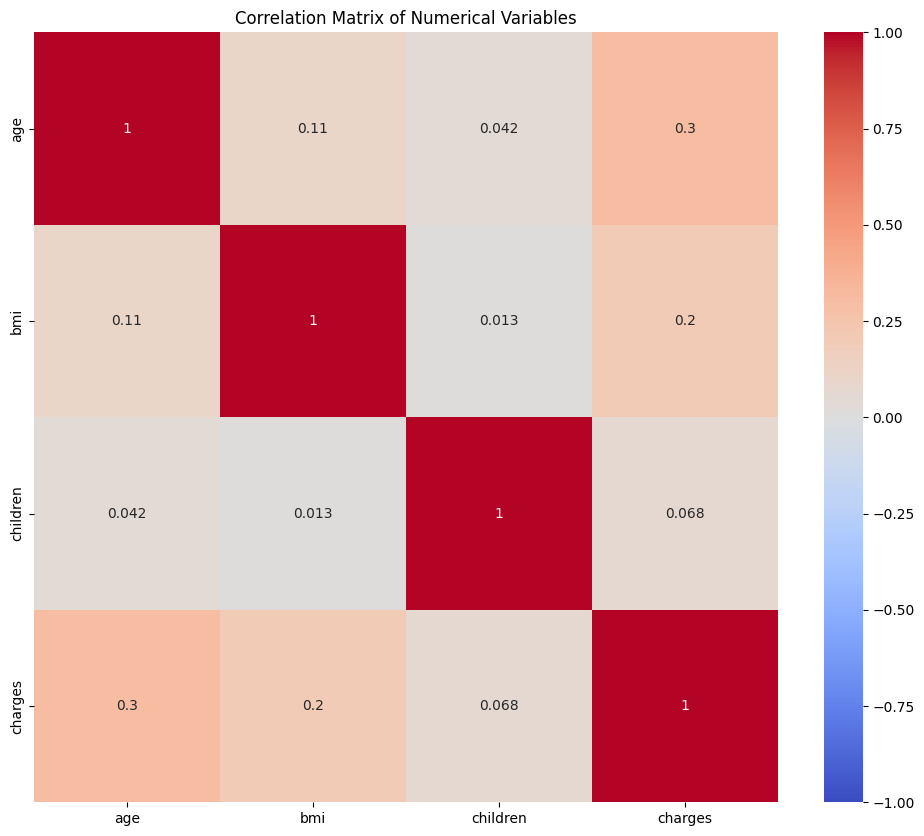

In [65]:
# Correlation matrix for numerical variables
numerical_vars = sam.select_dtypes(include=[np.number]).columns
correlation_matrix = sam[numerical_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()